# 1. Conduct experiment

In [19]:
import copy

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from constraint_relax import search_mfs
from experiment_constraint_data_processor import process_experiment_constraint_data
from values import real_data_path, simulated_data_path
from similarity_calculator import compute_similarity
from utils import get_df_len

In [20]:
def experiment(problem_list, item_path):
    result = pd.DataFrame()
    threshold_list = ['', 0, 0.25, 0.5, 0.75, 1]
    for problem in problem_list:
        prob_sol_list = dict()
        for threshold in threshold_list:
            p = copy.deepcopy(problem)
            if threshold != '':
                mfs = search_mfs(p.constraint_list, copy.copy(p.constraint_list), item_path)
                p.relax(mfs, threshold)
            prob_items = p.solve()
            prob_sol_list.update({
                f'constraint_{threshold}': [c.__dict__ for c in p.constraint_list],
                f'no_of_items_{threshold}': get_df_len(prob_items)
            })
            if not prob_items is None:
                prob_sol_list.update({
                    f'similarity_{threshold}': ((compute_similarity(p.constraint_list, prob_items, item_path))['similarity']).mean()
                })
            else:
                prob_sol_list.update({
                    f'similarity_{threshold}': 0
                })
        result = result.append(prob_sol_list, ignore_index=True)
    return result

In [21]:
if not os.path.isdir('./experiment_result'):
    os.mkdir('./experiment_result')

real_item_problem_list = process_experiment_constraint_data('./experiment_constraint_data.csv', real_data_path)
real_item_experiment_result = experiment(real_item_problem_list, real_data_path)
real_item_experiment_result.to_csv('./experiment_result/real_item_experiment_result.csv', index=False)
simulated_item_problem_list = process_experiment_constraint_data('./experiment_constraint_data.csv', simulated_data_path)
simulated_item_experiment_result = experiment(simulated_item_problem_list, simulated_data_path)
simulated_item_experiment_result.to_csv('./experiment_result/simulated_item_experiment_result.csv', index=False)

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)
C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.a

C:\Users\bttec\AppData\Local\Temp\ipykernel_16268\2209626006.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(prob_sol_list, ignore_index=True)


# 2. Process Result

## 2.1 Overall Performance

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
real_result = pd.read_csv('./experiment_result/real_item_experiment_result.csv')
simulated_result = pd.read_csv('./experiment_result/simulated_item_experiment_result.csv')
results = [real_result, simulated_result]

In [60]:
data_result = real_result
constraint_cols = [c for c in data_result.columns if 'constraint_' in c]
no_of_items_cols = [c for c in data_result.columns if 'no_of_items_' in c]
similarity_cols = [c for c in data_result.columns if 'similarity_' in c]
n = 3

In [61]:
data_result.columns

Index(['constraint_', 'no_of_items_', 'similarity_', 'constraint_0',
       'no_of_items_0', 'similarity_0', 'constraint_0.25', 'no_of_items_0.25',
       'similarity_0.25', 'constraint_0.5', 'no_of_items_0.5',
       'similarity_0.5', 'constraint_0.75', 'no_of_items_0.75',
       'similarity_0.75', 'constraint_1', 'no_of_items_1', 'similarity_1'],
      dtype='object')

In [62]:
data_result_less_than_n = data_result[data_result.loc[:, 'no_of_items_'] < n]
data_result_at_least_n = data_result[data_result.loc[:, 'no_of_items_'] >= n]

In [63]:
pd.DataFrame([
    (data_result_less_than_n.shape)[0],
    (data_result_at_least_n.shape)[0]
], index=[f'number of items < {n}', f'number of items >= n'],
columns=['frequency'])

,frequency
number of items < 3,349
number of items >= n,151


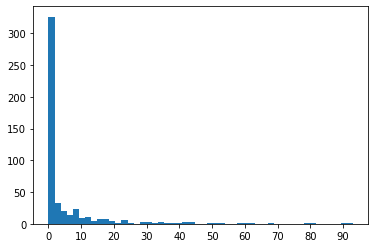

In [64]:
plt.hist(data_result.loc[:, 'no_of_items_'], bins = 50)
plt.xticks(np.arange(0, 100, 10))
plt.show()

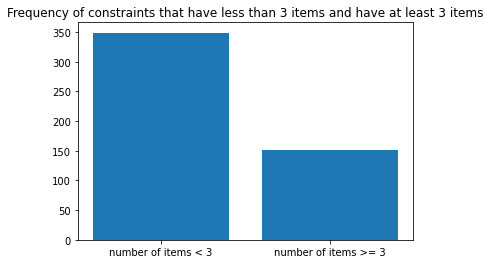

In [65]:
plt.bar([
    f'number of items < {n}',
    f'number of items >= {n}'], [
    (data_result_less_than_n.shape)[0],
    (data_result_at_least_n.shape)[0]
])
plt.title(f'Frequency of constraints that have less than {n} items and have at least {n} items')
plt.show()

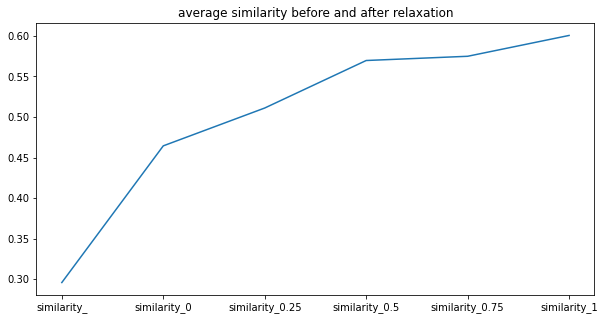

In [66]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(data_result.loc[:, similarity_cols].mean())
plt.title('average similarity before and after relaxation')
plt.show()

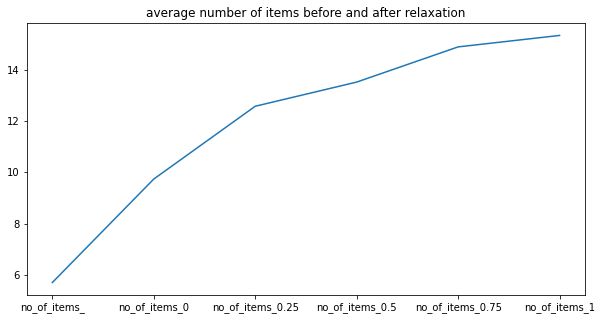

In [67]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(data_result.loc[:, no_of_items_cols].mean())
plt.title('average number of items before and after relaxation')
plt.show()

## 2.2 Compare Performances of constraint sets that retrieved < n and >= n items

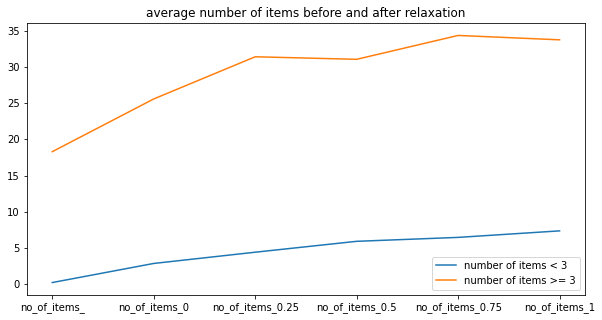

In [68]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
for result in [data_result_less_than_n, data_result_at_least_n]:
    plt.plot(result.loc[:, no_of_items_cols].mean())
    plt.title('average number of items before and after relaxation')
plt.legend([f'number of items < {n}', f'number of items >= {n}'], loc='lower right')
plt.show()

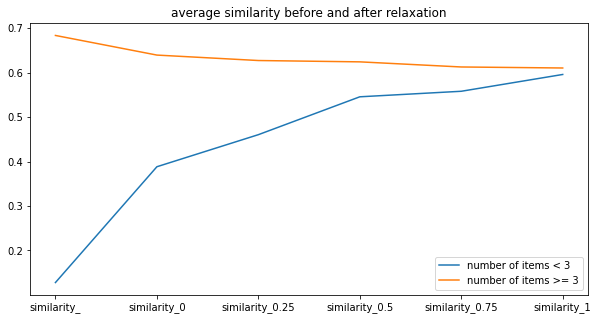

In [69]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
for result in [data_result_less_than_n, data_result_at_least_n]:
    plt.plot(result.loc[:, similarity_cols].mean())
    plt.title('average similarity before and after relaxation')
plt.legend([f'number of items < {n}', f'number of items >= {n}'], loc='lower right')
plt.show()

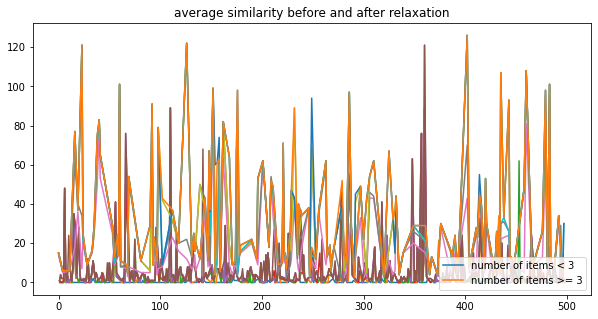